#### Amir Arfan - amir.inaamullah.arfan@nmbu.no

# Compulsory Assignment

In [1]:
import math
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols, mixedlm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import binom
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import numpy as np

## Task 1 - Listeria

### a) 

It is a **Random Effect Model** which can be expressed by this model:
$$ y_{ij} = \mu + \tau_i + \epsilon_{ij} \, \, , i = 1 ... a, \, j = 1 ... n$$

$y_{ij}$ is the Listeria Number for observation $j$ with the treatment $i$

$\mu$ is overall Listeria Number for all hams

$\tau_i$ is the treatment effect of Ham on the ListeriaNumber and is a random variable

$\epsilon_ij$ is the error between the treatments and is a random variable

$\sigma^2$ is the variance between the errors

$\sigma_t^2$ is the variance between the treatments



### b) 

The model assumptions regarding the random error is that it is independent and identically distributed to the normal distribution as random variables. Mathematically expressed as:
$$\epsilon_{ij} \stackrel{I.I.D}{\sim} N(0, \sigma^2)$$


### c) 

#### Fit the data

In [2]:
my_data = pd.read_csv("Listeria.csv", sep=";", header=0)
mod = ols("ListeriaNumber ~ C(HamTopping, Sum)", data=my_data).fit() # One could have used Mixedlm to indicate that this is a Mixed Linear Model
aov = sm.stats.anova_lm(mod)
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:         ListeriaNumber   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     4.135
Date:                Thu, 20 Aug 2020   Prob (F-statistic):            0.00383
Time:                        09:04:58   Log-Likelihood:                -781.14
No. Observations:                  48   AIC:                             1574.
Df Residuals:                      42   BIC:                             1585.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

#### Check for Normality

<Figure size 576x360 with 0 Axes>

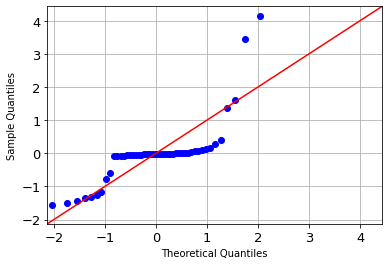

In [3]:
plt.figure(figsize=(8,5))
fig=qqplot(mod.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()

**Ut i fra QQ-ploten kan man konkludere med at de ikke følger en normalfordeling, hvis de hadde gjort det burde de ha følgt den rette linjen på 45 grader.**

#### Check for Constant Variance

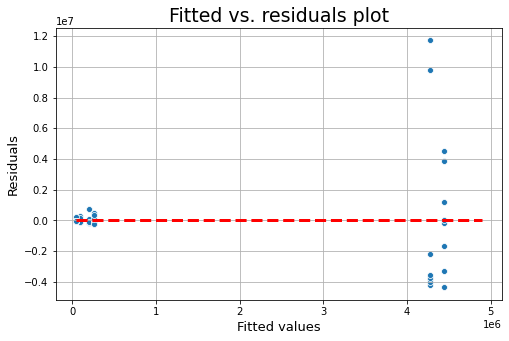

In [4]:
plt.figure(figsize=(8, 5))
scat = sns.scatterplot(x=mod.fittedvalues, y=mod.resid)
xmin=min(mod.fittedvalues)
xmax = max(mod.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=13)
plt.ylabel("Residuals",fontsize=13)
plt.title("Fitted vs. residuals plot",fontsize=19)
plt.grid(True)
plt.show()

**From the plot one can see the nonconstant variance, so the constant variance assumption is not verified**

### d) 

In [5]:
log_data = my_data.copy()
log_data["ListeriaNumber"] = np.log(my_data["ListeriaNumber"])
print(log_data.head(5))

   ListeriaNumber HamTopping
0       10.089967      HamT1
1       11.695247      HamT1
2       13.775834      HamT1
3        9.746834      HamT1
4       11.302204      HamT1


### e)

In [6]:
log_mod = ols("ListeriaNumber ~ C(HamTopping, Sum)", data=log_data).fit() # One could have used Mixedlm to indicate that this is a Mixed Linear Model
log_aov = sm.stats.anova_lm(log_mod)
print(log_mod.summary())

                            OLS Regression Results                            
Dep. Variable:         ListeriaNumber   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     10.53
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           1.34e-06
Time:                        09:04:59   Log-Likelihood:                -89.566
No. Observations:                  48   AIC:                             191.1
Df Residuals:                      42   BIC:                             202.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

**The interpretation of $y_{it}$ is now the listeria number with a log transformation applied, so when interpreting the results one must consider that the response variable has been log transformed**

#### Test for Error Assumption with log transformation

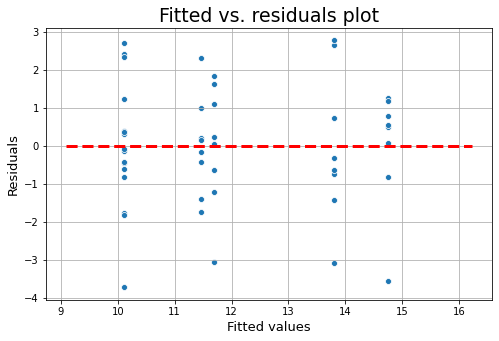

In [7]:
# Check for constant variance
plt.figure(figsize=(8, 5))
scat = sns.scatterplot(x=log_mod.fittedvalues, y=log_mod.resid)
xmin=min(log_mod.fittedvalues)
xmax = max(log_mod.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=13)
plt.ylabel("Residuals",fontsize=13)
plt.title("Fitted vs. residuals plot",fontsize=19)
plt.grid(True)
plt.show()

**Model seems to be showing constant variance after the log transformation** 

<Figure size 576x360 with 0 Axes>

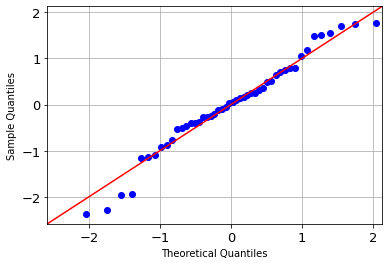

In [8]:
# Check for Normality
plt.figure(figsize=(8,5))
fig=qqplot(log_mod.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()

**Model also seems to be following the normality assumption after the log transformation**

### f)

#### Hypotesetest
$H_0$ : $\sigma_t^2 = 0$

$H_A$ : $\sigma_t^2 > 0$

Using ANOVA to find the p-value:

In [9]:
print(log_aov)

                      df      sum_sq    mean_sq          F    PR(>F)
C(HamTopping, Sum)   5.0  147.149539  29.429908  10.532437  0.000001
Residual            42.0  117.357092   2.794216        NaN       NaN


**With a significant-value of 0.01 the null hypothesis is rejected, which indicates that there is an effect of brand**

### g)

In [10]:
# Estimates of the parameters
mu = log_mod.params[0]
mu, t_1, t_2, t_3, t_4, t_5 = log_mod.params
t_6 = abs(sum([t_1, t_2, t_3, t_4, t_5]))
n = 8
sig_er = log_aov.mean_sq["Residual"]
sig_tr = (log_aov.mean_sq["C(HamTopping, Sum)"] - sig_er) / n
print(f'''

mu = {mu:.2f}

Tau1 = {t_1:.2f}

Tau2 = {t_2:.2f}

Tau3 = {t_3:.2f}

Tau4 = {t_4:.2f}

Tau5 = {t_5:.2f}

Tau6 = {t_6:.2f}

Sigma Squared for Error = {sig_er:.2f}

Sigma Squared for Treatment = {sig_tr:.2f}


''')



mu = 11.99

Tau1 = -0.52

Tau2 = -1.88

Tau3 = -0.30

Tau4 = 2.76

Tau5 = -1.89

Tau6 = 1.82

Sigma Squared for Error = 2.79

Sigma Squared for Treatment = 3.33





### h)


Intraclass correlation (ICC) tells you how much similarity there is between values within the treatment group, i.e one could interpret this as how much of the value is inherited by the treatment. The ICC goes from 0 to 1, where 0 would mean that there is little similarity within the groups, and a high ICC indicates high similarity of the values within the groups.

In [11]:
icc = sig_tr / (sig_tr + sig_er)
print(f'ICC: {icc}')
n= 8
L = 1/n * (((log_aov.mean_sq["C(HamTopping, Sum)"]/sig_er)*(1/stats.f.isf(0.025, 5, 42))) - 1)
U = 1/n * (((log_aov.mean_sq["C(HamTopping, Sum)"]/sig_er)*(1/stats.f.isf(0.975, 5, 42))) - 1)

lower = L / (1+L)
upper = U / (1+U)

print(f'Confidence Interval is given by [{lower}, {upper}]')

ICC: 0.5437028972510471
Confidence Interval is given by [0.24873440653068443, 0.8888267351162339]


**We get a relatively high level of ICC which indicates that there might be significant correlation among observations within the same treatment group**

### i)

In [12]:
est_mean = mu
alpha = 0.05
a = 6
n = 8
lower = est_mean - (stats.t.isf(alpha/2, a*(n-1))*math.sqrt(log_aov.mean_sq["C(HamTopping, Sum)"]/(a*n)))
upper = est_mean + (stats.t.isf(alpha/2, a*(n-1))*math.sqrt(log_aov.mean_sq["C(HamTopping, Sum)"]/(a*n)))

print(f'Confidence Interval is given by {lower,upper}')

Confidence Interval is given by (10.409494146532195, 13.569897912501604)


**We are 95% certain that the overall mean lies between the lower and upper value of the confidence interval** 

## Task 2 - Fishing Experiment

### a)

In [13]:
fish_data = pd.read_csv("FishingExperiment.csv", sep=";", decimal=",", header=0)
print(fish_data.head(5))

   Yield  Hook   Lake     Time
0   14.0  Lure  Lake1  Morning
1   15.1  Lure  Lake1  Morning
2   12.4  Lure  Lake1  Morning
3   12.7  Lure  Lake1  Evening
4   17.2  Lure  Lake1  Evening


In [14]:
full_fish_mod = ols("Yield ~ C(Hook, Sum)*C(Lake, Sum)*C(Time, Sum)", data=fish_data).fit()
full_fish_aov = sm.stats.anova_lm(full_fish_mod)
print(full_fish_aov)

                                          df      sum_sq    mean_sq  \
C(Hook, Sum)                             1.0   79.053333  79.053333   
C(Lake, Sum)                             3.0  125.594167  41.864722   
C(Time, Sum)                             1.0    1.840833   1.840833   
C(Hook, Sum):C(Lake, Sum)                3.0   99.765000  33.255000   
C(Hook, Sum):C(Time, Sum)                1.0    1.920000   1.920000   
C(Lake, Sum):C(Time, Sum)                3.0   17.824167   5.941389   
C(Hook, Sum):C(Lake, Sum):C(Time, Sum)   3.0    6.381667   2.127222   
Residual                                32.0   75.160000   2.348750   

                                                F        PR(>F)  
C(Hook, Sum)                            33.657619  1.929639e-06  
C(Lake, Sum)                            17.824256  5.536719e-07  
C(Time, Sum)                             0.783750  3.826009e-01  
C(Hook, Sum):C(Lake, Sum)               14.158595  4.808833e-06  
C(Hook, Sum):C(Time, Sum)     

In [15]:
reduced_fish_mod = ols("Yield ~ C(Hook, Sum)*C(Lake, Sum)", data=fish_data).fit()
reduced_fish_aov = sm.stats.anova_lm(reduced_fish_mod)
print(reduced_fish_aov)


                             df      sum_sq    mean_sq          F  \
C(Hook, Sum)                1.0   79.053333  79.053333  30.662616   
C(Lake, Sum)                3.0  125.594167  41.864722  16.238175   
C(Hook, Sum):C(Lake, Sum)   3.0   99.765000  33.255000  12.898701   
Residual                   40.0  103.126667   2.578167        NaN   

                                 PR(>F)  
C(Hook, Sum)               2.109975e-06  
C(Lake, Sum)               4.681421e-07  
C(Hook, Sum):C(Lake, Sum)  4.889917e-06  
Residual                            NaN  


#### Partial F-test

**$H_0$ : All parameters removed from full model $= 0$**

**$H_A$: At least one parameter not removed $\neq 0$**

In [16]:
SSer = reduced_fish_aov.sum_sq["Residual"]
SSef = full_fish_aov.sum_sq["Residual"]
dfer = 40
dfef = 32
F_0 = ((SSer - SSef)/(dfer - dfef)) / (SSef/dfef)
print(F_0)
crit_f_value = stats.f.ppf(1-0.05, dfer-dfef, dfef)
print(crit_f_value)
p_value = stats.f.sf(F_0, dfer-dfef, dfef)
print(p_value)

1.4883803441546923
2.244396138800042
0.200329889163724


**From the P-value one can conclude that the null hypothesis is accepted and thus one can proceed to reduce this model**

### b)

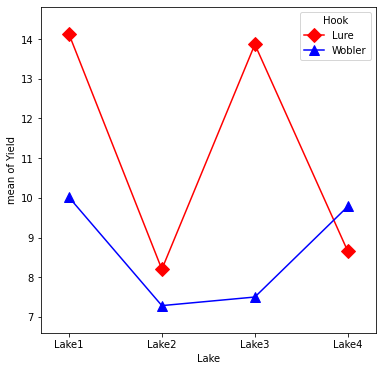

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(x=fish_data["Lake"], trace=fish_data["Hook"], response=fish_data["Yield"],
                        colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)
plt.show()

From the lack of parallellism one can say that there is potential interaction.

### c) 

#### Partial F-test

**$H_0$ : All parameters removed from full model $= 0$**

**$H_A$: At least one parameter not removed $\neq 0$**

In [18]:
more_reduced_fish_mod = ols("Yield ~ C(Hook, Sum)+C(Lake, Sum)", data=fish_data).fit()
more_reduced_fish_aov = sm.stats.anova_lm(more_reduced_fish_mod)
print(more_reduced_fish_aov)

                df      sum_sq    mean_sq          F    PR(>F)
C(Hook, Sum)   1.0   79.053333  79.053333  16.754228  0.000184
C(Lake, Sum)   3.0  125.594167  41.864722   8.872632  0.000108
Residual      43.0  202.891667   4.718411        NaN       NaN


In [19]:
SSer = more_reduced_fish_aov.sum_sq["Residual"]
SSef = reduced_fish_aov.sum_sq["Residual"]
dfer = 43
dfef = 40
F_0 = ((SSer - SSef)/(dfer - dfef)) / (SSef/dfef)
print(F_0)
crit_f_value = stats.f.ppf(1-0.05, dfer-dfef, dfef)
print(crit_f_value)
p_value = stats.f.sf(F_0, dfer-dfef, dfef)
print(p_value)

12.89870062706057
2.8387453980206443
4.88991661963464e-06


**One can reject the Null Hypothesis by looking at the p-value, meaning that there is most likely interaction between the factors**

### d)

In [20]:
print(reduced_fish_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     16.87
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           3.86e-10
Time:                        09:05:01   Log-Likelihood:                -86.463
No. Observations:                  48   AIC:                             188.9
Df Residuals:                      40   BIC:                             203.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [21]:
Lake3 = reduced_fish_mod.params[4]
Lake2_Wobler = abs(reduced_fish_mod.params[6])
print(f"""


For Lake3 = {Lake3:.2f}

For interaction-term between Lake2 and Wobler = {Lake2_Wobler:.2f}
""")




For Lake3 = 0.75

For interaction-term between Lake2 and Wobler = 0.82



### e)

In [22]:
comparisons = MultiComparison(fish_data["Yield"],groups=fish_data["Hook"]+'&' + fish_data["Lake"])
print(comparisons.tukeyhsd(alpha=0.05).summary())


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  Lure&Lake1   Lure&Lake2  -5.9333  0.001 -8.8966 -2.9701   True
  Lure&Lake1   Lure&Lake3  -0.2667    0.9 -3.2299  2.6966  False
  Lure&Lake1   Lure&Lake4  -5.4833  0.001 -8.4466 -2.5201   True
  Lure&Lake1 Wobler&Lake1  -4.1167 0.0016 -7.0799 -1.1534   True
  Lure&Lake1 Wobler&Lake2    -6.85  0.001 -9.8133 -3.8867   True
  Lure&Lake1 Wobler&Lake3  -6.6333  0.001 -9.5966 -3.6701   True
  Lure&Lake1 Wobler&Lake4    -4.35  0.001 -7.3133 -1.3867   True
  Lure&Lake2   Lure&Lake3   5.6667  0.001  2.7034  8.6299   True
  Lure&Lake2   Lure&Lake4     0.45    0.9 -2.5133  3.4133  False
  Lure&Lake2 Wobler&Lake1   1.8167 0.5177 -1.1466  4.7799  False
  Lure&Lake2 Wobler&Lake2  -0.9167    0.9 -3.8799  2.0466  False
  Lure&Lake2 Wobler&Lake3     -0.7    0.9 -3.6633  2.2633  False
  Lure&Lake2 Wobler&Lake4